## 1) Simple Octave/MATLAB function

The first part of ``ex1.m`` gives you practice with Octave/MATLAB syntax and the homework submission process. In the file ``warmUpExercise.m``, you will find the outline of an Octave/MATLAB function.

In [11]:
A = eye(5)

A =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1



## 2) Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [ ]:
% load data
data = load('/home/roger/Workspace/MOOC/Coursera/MLearning/Week 2/Assignment/ex1/ex1data1.txt');
X = data(:, 1); 
y = data(:, 2);
m = length(y);

### 2.1) Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

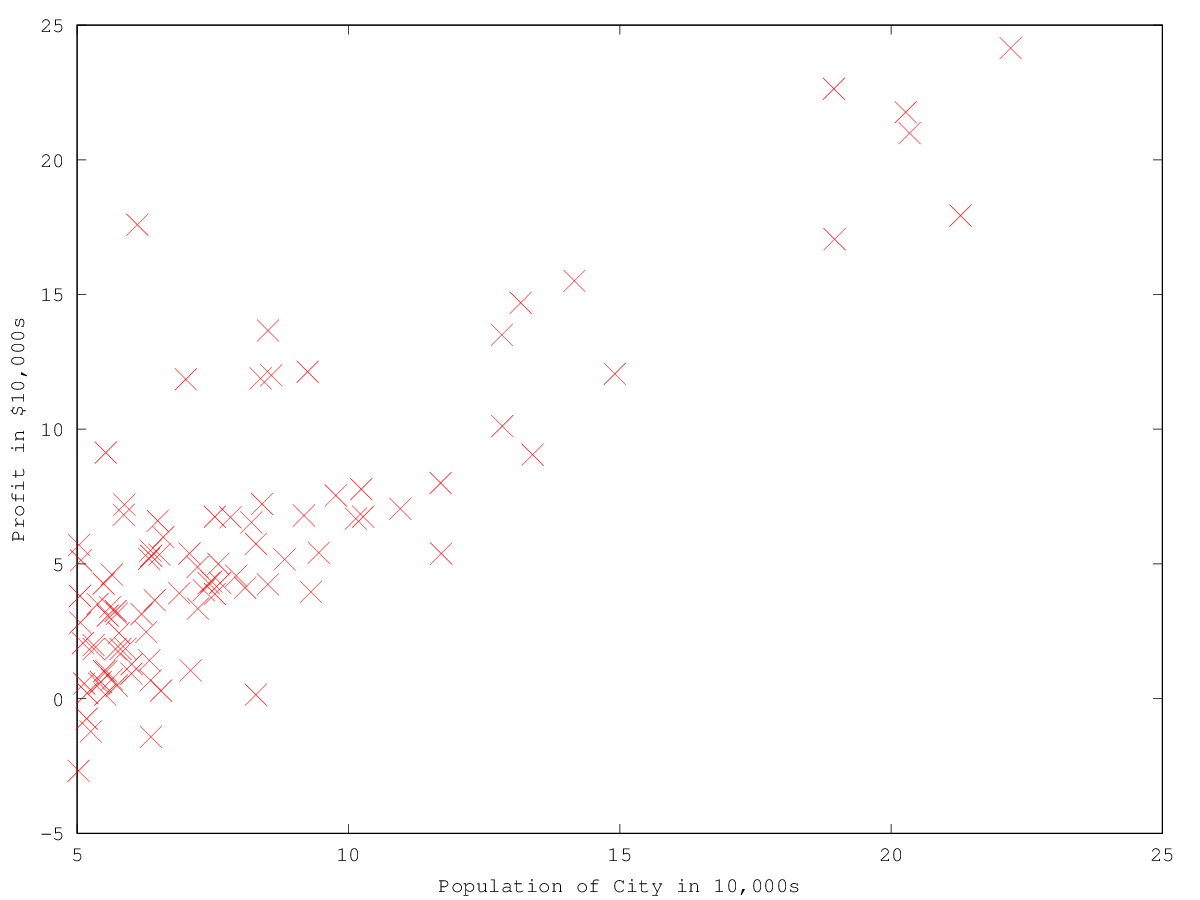

In [8]:
plot(X, y, 'rx', 'MarkerSize', 10);      % Plot the data
ylabel('Profit in $10,000s');            % Set the y−axis label
xlabel('Population of City in 10,000s'); % Set the x−axis label

## 2.2 Gradient Descent

In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.

### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function:

$$ J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model 

$$h_\theta(x) = \theta^TX = \theta_0 + \theta_1X_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm.

In [9]:
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1);         % initialize fitting parameters
iterations = 1500;
alpha = 0.01;

### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code in the file ``computeCost.m``, which is a function that computes $J(\theta)$. As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set. Once you have completed the function, the next step in ``ex1.m`` will run `computeCost` once using $\theta$ initialized to zeros, and you will see the cost printed to the screen.

You should expect to see a cost of **32.07**.

In [25]:
function J = computeCost(X, y, theta)
    m = length(y); % number of training examples

    % You need to return the following variables correctly 
    J = 0;
    m = size(X, 1);         % number of training examples
    predictions = X*theta;  % predictions of hypothesis on all m examples
    sqrErrors = (predictions-y).^2; %squared errors
    J = 1/(2*m) * sum(sqrErrors);
end

### 2.2.4 Gradient descent

Next, you will implement gradient descent in the file ``gradientDescent.m``. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration.

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not X and y. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing X or y. Refer to the equations in this handout and to the video lectures if you are uncertain.

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. The starter code for ``gradientDescent.m`` calls `computeCost` on every iteration and prints the cost. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [26]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
    m = length(y); % number of training examples
    J_history = zeros(num_iters, 1);

    for iter = 1:num_iters
        errors = (X * theta) - y;
        delta = (1/m) * X' * errors;
        theta = theta - alpha * delta;

        % Save the cost J in every iteration    
        J_history(iter) = computeCost(X, y, theta);
    end
end

In [28]:
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 10;
alpha = 0.01;

% compute and display initial cost
computeCost(X, y, theta)

% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);
disp(theta)

ans =  32.073
   0.0086469
   0.8007915


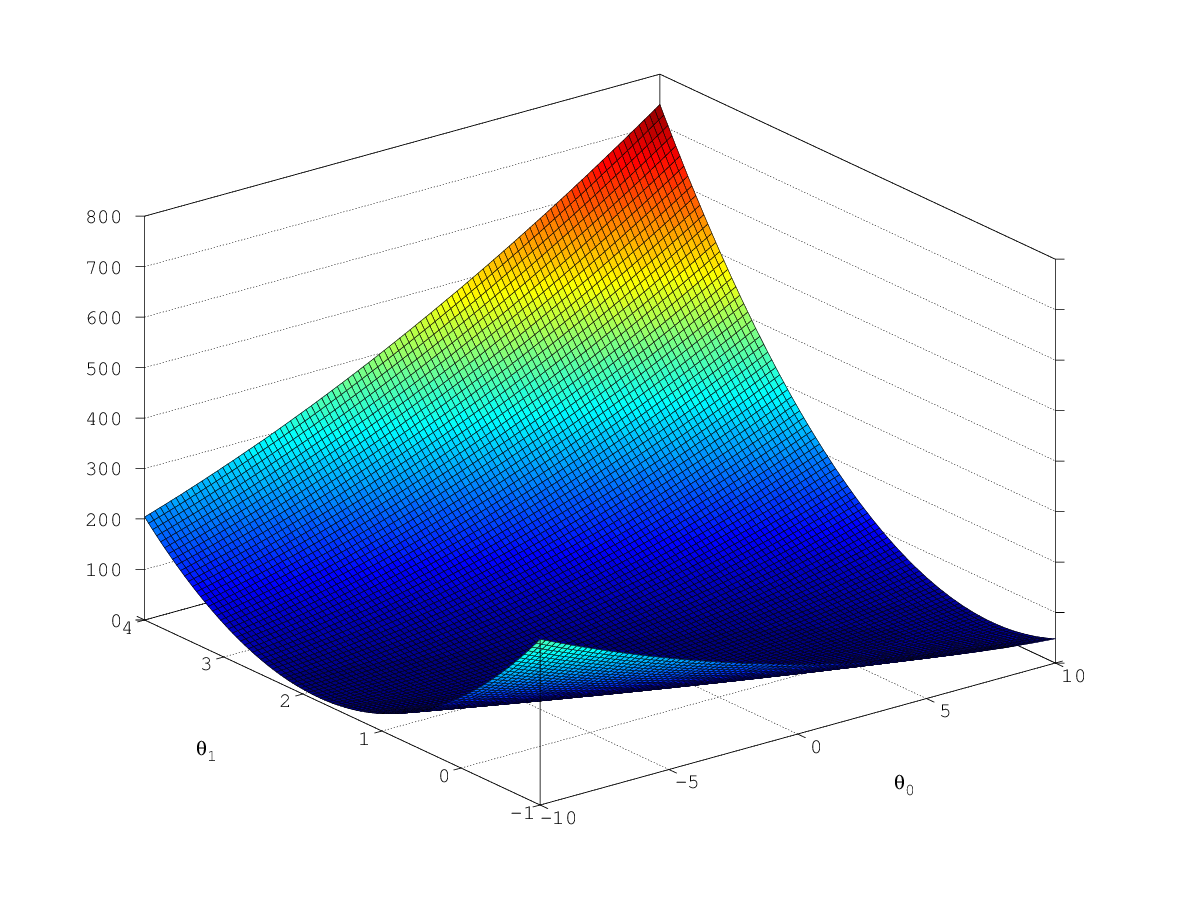

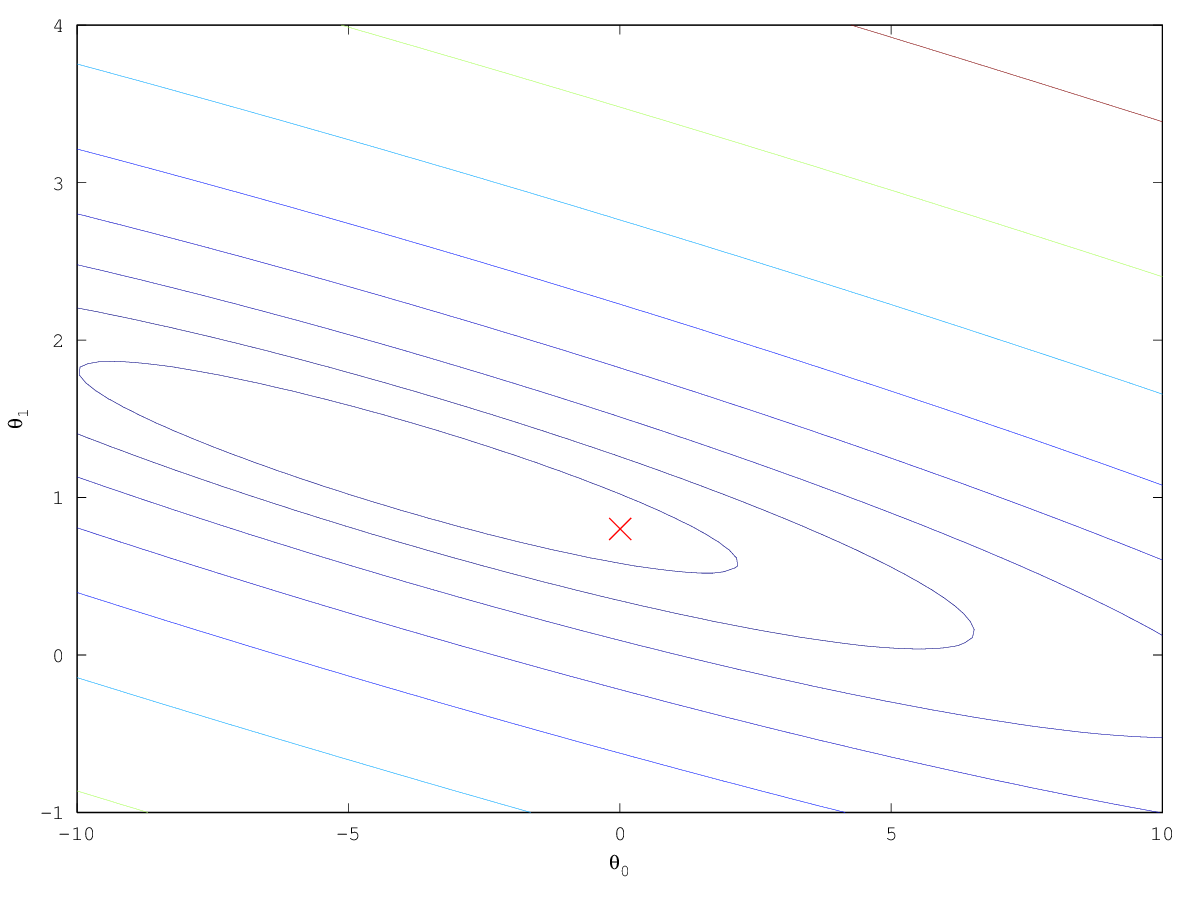

In [32]:
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));
% Fill out J vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
        t = [theta0_vals(i); theta1_vals(j)];
        J_vals(i,j) = computeCost(X, y, t);
    end
end

% Because of the way meshgrids work in the surf command, we need to 
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);